<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/ReviewsRatingsCategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [2]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [3]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [4]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Statistical summary

In [5]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

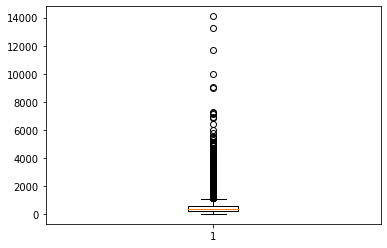

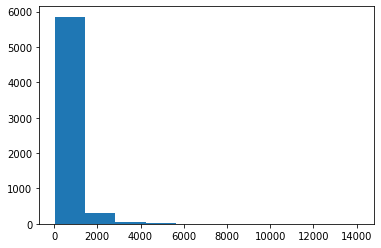

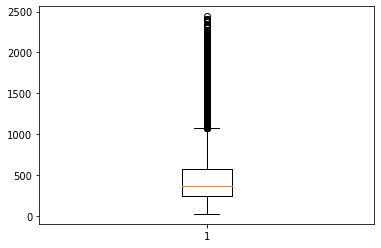

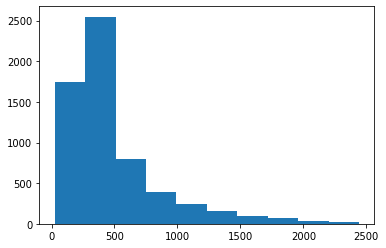

In [6]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [7]:
train_data.describe()

,Price
count,6105.000000
mean,487.640822
std,384.816876
min,25.000000
25%,248.000000
50%,369.000000
75%,579.000000
max,2442.000000


Reviews Normalization

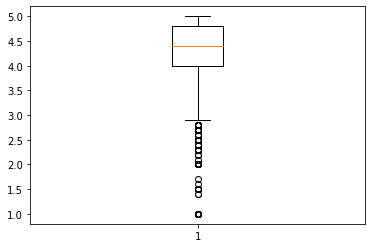

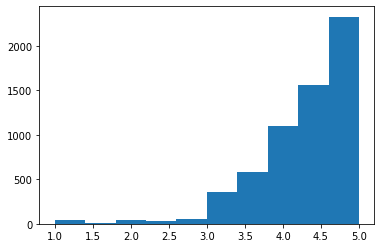

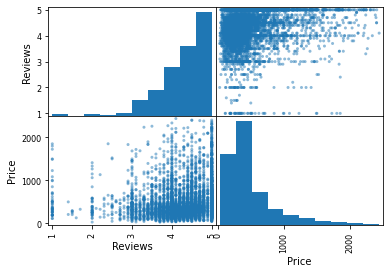

In [8]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()

Ratings Normalization

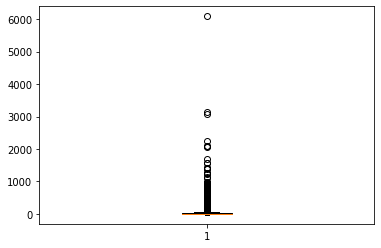

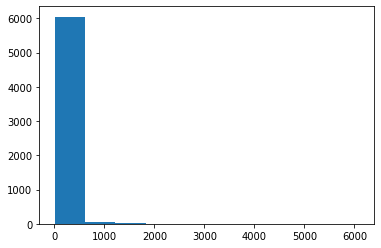

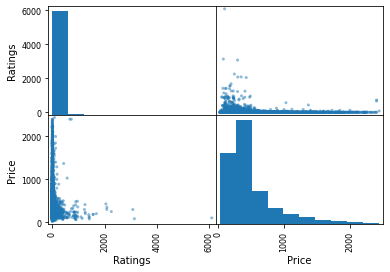

In [9]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [10]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [11]:
train_data.pop('Edition')

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6232     Paperback,– 8 Aug 2018
6233    Paperback,– 21 Nov 2016
6234     Paperback,– 8 Jun 2006
6235    Paperback,– 15 Jan 2015
6236    Paperback,– 21 Dec 2016
Name: Edition, Length: 6105, dtype: object

In [12]:
train_data.head()

,Reviews,Ratings,BookCategory,Price
0,4.0,8.0,Action & Adventure,220.00
1,3.9,14.0,"Biographies, Diaries & True Accounts",202.93
2,4.8,6.0,Humour,299.00
3,4.1,13.0,"Crime, Thriller & Mystery",180.00
4,5.0,1.0,"Arts, Film & Photography",965.62


Book Category Normalization / Extract Categories

In [13]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Correlation Matrix

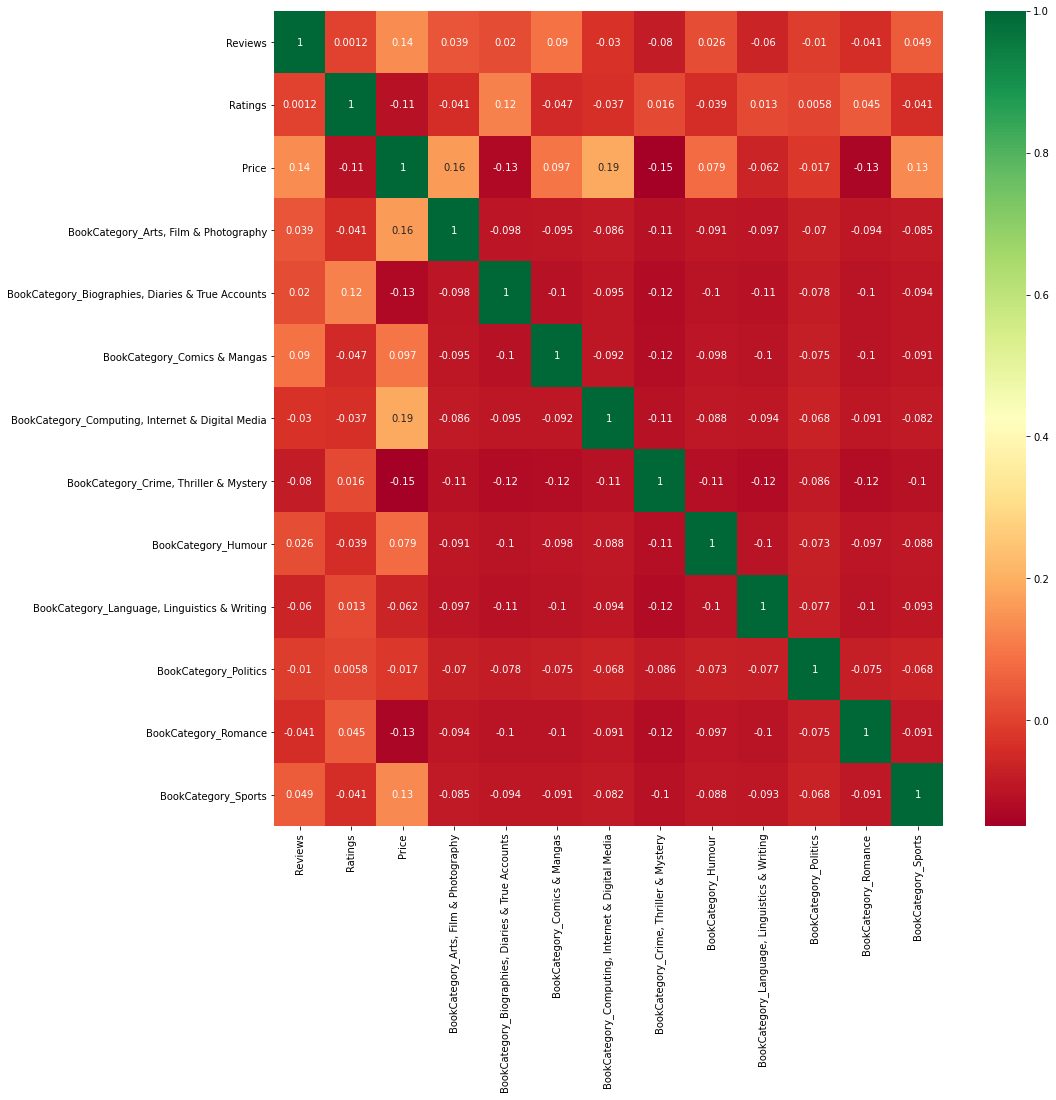

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')

Finish training inputs(z)

In [18]:
train_data.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [20]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 

Ratings Normalization

In [19]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating  

Drop Title & Synopsis columns

In [21]:
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Author')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [22]:
test_data.pop('Edition')

0       Mass Market Paperback,– 1 Oct 1986
1          Paperback,– Import, 26 Apr 2018
2                  Paperback,– 17 Mar 2011
3                         Paperback,– 2016
4                  Paperback,– 26 Dec 2011
                       ...                
1555               Paperback,– 14 Apr 2011
1556                Paperback,– 8 May 2013
1557                Paperback,– 6 Sep 2011
1558               Paperback,– 22 Sep 2009
1559               Paperback,– 16 Sep 2016
Name: Edition, Length: 1560, dtype: object

In [23]:
test_data.head()

,Reviews,Ratings,BookCategory
0,4.4,960.0,"Crime, Thriller & Mystery"
1,5.0,1.0,"Computing, Internet & Digital Media"
2,5.0,4.0,Romance
3,4.1,11.0,"Computing, Internet & Digital Media"
4,4.4,9.0,"Language, Linguistics & Writing"


Book Category Normalization / Extract Categories

In [24]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [25]:
z_test = test_data
z_test.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.4,960.0,0,0,0,0,1,0,0,0,0,0
1,5.0,1.0,0,0,0,1,0,0,0,0,0,0
2,5.0,4.0,0,0,0,0,0,0,0,0,1,0
3,4.1,11.0,0,0,0,1,0,0,0,0,0,0
4,4.4,9.0,0,0,0,0,0,0,1,0,0,0


In [27]:
y = train_data.pop('Price')
train_data.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8.0,0,0,0,0,0,0,0,0,0,0
1,3.9,14.0,0,1,0,0,0,0,0,0,0,0
2,4.8,6.0,0,0,0,0,0,1,0,0,0,0
3,4.1,13.0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,1,0,0,0,0,0,0,0,0,0


##Prediction Methods##

Split train and test data


In [28]:
X = train_data.to_numpy()
y = y.to_numpy()

Import packages

In [29]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Decision Tree Regressor


In [ ]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_DT = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_DT.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor(**grid_DT.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

Gradient Boosting Regressor




In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [4,6,8,10]
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_GBR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(**grid_GBR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

Random Forest regressor






In [ ]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_RF.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

KNeighbors Regressor




In [ ]:
parameters = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_KNN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor(**grid_KNN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head(

Elastic Net




In [ ]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_EN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_EN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_EN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_EN.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet(**grid_EN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

Lasso




In [ ]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_LASSO = GridSearchCV(estimator=Lasso(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_LASSO.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LASSO.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LASSO.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LASSO.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso(**grid_LASSO.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()